# Исследование рынка

Для открытия кафе в г. Москва неободимо провести исследование рынка. Источником данных для исследования являются открытые данные из сети интернет о заведениях общественного питания в г Москве. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [2]:
try:
  rest = pd.read_csv('/content/drive/MyDrive/Data/rest_data.csv')
except:
  rest = pd.read_csv('/datasets/rest_data.csv')

## Предобработка данных

In [3]:
rest.info()
rest.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


В данных нет пропусков, тип данных в файле корректный.

In [4]:
rest.loc[:, 'object_name':'number'].duplicated().sum()

82

In [5]:
rest = rest.drop_duplicates(['object_name','chain','object_type', 'address','number'])
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15284 non-null  int64 
 1   object_name  15284 non-null  object
 2   chain        15284 non-null  object
 3   object_type  15284 non-null  object
 4   address      15284 non-null  object
 5   number       15284 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 835.8+ KB


In [6]:
rest['object_name'].value_counts()

Столовая                             267
Шаурма                               226
Кафе                                 222
KFC                                  155
Шоколадница                          142
                                    ... 
Столовая Гимназии № 1576 корпус 4      1
Столовая МВД РФ (закрытое)             1
Шаурма-шашлык                          1
Столовая «Текстильная Академия»        1
Ресторан «БЕТА»                        1
Name: object_name, Length: 10393, dtype: int64

В данных обнаружены дубликаты, для анализа удалим повторяющиеся строки. Наименования есть повторяющиеся. Возможно  это сетевые заведения или пункты общественного питания без названия, например "Столовая".

In [7]:
rest['number'].describe()

count    15284.000000
mean        59.784350
std         74.838657
min          0.000000
25%         14.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

In [8]:
rest.query('number == 1700')

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700


In [9]:
rest.query('number == 0').head()

,id,object_name,chain,object_type,address,number
137,115498,Пекарня & Донер,нет,закусочная,"город Москва, Бутырская улица, дом 9, корпус 2",0
154,152556,Шаурма в пите,нет,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 72, корпус 2",0
157,149568,Суши,нет,предприятие быстрого обслуживания,"город Москва, улица Маршала Василевского, дом ...",0
190,126956,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 1-я Владимирская улица, дом 21",0
195,149531,"Шаурма, куры-гриль",нет,предприятие быстрого обслуживания,"город Москва, 2-я Владимирская улица, дом 44/10",0


In [10]:
rest.query('number == 0').groupby('object_type').agg({'id':'count'})

,id
object_type,
бар,28
буфет,64
закусочная,182
кафе,306
кафетерий,111
магазин (отдел кулинарии),145
предприятие быстрого обслуживания,690
ресторан,44
столовая,19


In [11]:
rest.query('number == 0 and object_type == "ресторан"').groupby('object_name').agg({'id':'count'})

,id
object_name,
BOKKER,1
CoffeeShop,1
KFC,3
Marmalato,1
Porto-Pomodoro,1
Shvilli (реторан Швили),1
БУРГЕР РУС,1
Бургер Кинг,4
ВАЙТ ВОТЕРС ХОСПИТАЛИТИ ПАРТНЕРС,1


В файле содержатся данные с 0 количеством мест или 1700 мест. Заведня с 0 количством мест скорее всего это заведения работающие на вынос. Заведение с 1700 мест - это крупный ночной клуб где проводятся концерты. Думаю данные нужно оставить без именения, тк. они не выглдят ошибочными.

## Исследование объектов общественного питания

1. Проведем анализ соотношения видов объектов общественного питания по количеству заведений.

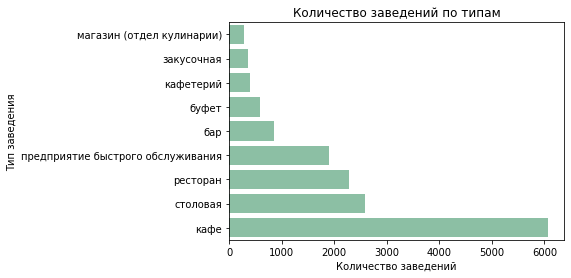

In [12]:
rest_type = rest.pivot_table(index='object_type',
                             values='id',
                             aggfunc='count').reset_index().sort_values(by='id')

fig = plt.figure()
fig.patch.set_facecolor('white')
fig.patch.set_alpha(1.0)

ax = fig.add_subplot(111)
sns.barplot(data = rest_type, x='id', y='object_type',orient='h', color='#84C7A4')
ax.patch.set_facecolor('white')
ax.patch.set_alpha(1.0)
plt.xlabel('Количество заведений')
plt.ylabel('Тип заведения')
plt.title('Количество заведений по типам')
plt.show()

Самое большое количество заведений относится к категории "Кафе" - около 6 тыс. Далее по количеству заведений можно выделить предприятия быстррого обслуживания, рестораны и столовые. У них доли примерно одинаковые 2-2,5 тыс.

2. Исследуем соотношения сетевых и несетевых заведений по количеству.

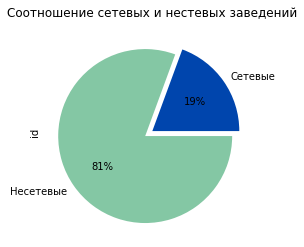

In [13]:
rest.pivot_table(index='chain',
                 values='id',
                 aggfunc='count').reset_index()['id'].plot(kind='pie', 
                                                           labels=['Сетевые', 'Несетевые'],
                                                           colors=['#0045AD', '#84C7A4'],
                                                           autopct='%.0f%%',
                                                           explode = (0, 0.1))


plt.title('Соотношение сетевых и нестевых заведений')
plt.show()

На диаграмме видно, что сетевые заведения составляют примерно 1/5 от всех заведений. 4/5 части - это несетевые заведения.

3. Проверим для какого вида объекта общественного питния характерно сетевое распространение. 

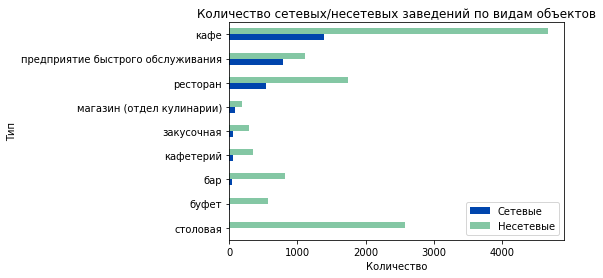

In [14]:
rest.pivot_table(index='object_type',
                 columns='chain',
                 values='id',
                 aggfunc='count').reset_index().sort_values(
                     by='да').rename(columns={'да':'Сетевые',
                                              'нет':'Несетевые'}).plot(kind='barh',
                                                                       x='object_type',
                                                                       color=['#0045AD', '#84C7A4'])

plt.xlabel('Количество')
plt.ylabel('Тип')
plt.title('Количество сетевых/несетевых заведений по видам объектов')
plt.legend()
plt.show()                                                                          

На диаграмме мы видим что самое большое количество сетевых заведений относится к категории "Кафе". Таже большая доля заведений относятся к категориям "Предприятие быстрого обслуживания" и "Ресторан".

4. Определим что харатерно для сетевых заведений: много заведений с небольшим количеством посадочных мест или мало заведений с большим количеством. 

Text(0.5, 1.0, 'Распределение объектов общественного питания в зависимости от количества посадочных мест')

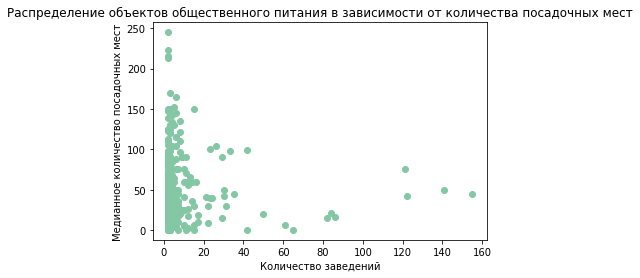

In [15]:
chain = rest.query('chain == "да"').groupby('object_name').agg({'id':'count', 
                                                                'number':'median'}).reset_index()


plt.scatter(data=chain.query('id != 1'), 
                             y='number', 
                             x='id',
                             color='#84C7A4')
plt.xlabel('Количество заведений')
plt.ylabel('Медианное количество посадочных мест')
plt.title('Распределение объектов общественного питания в зависимости от количества посадочных мест')


На графике видно что в основном сетвые заведения 
представлены не более 20 шт с 0-150 посадочных мест. Думаю можно сказать что преобладают заведения с большим количеством посадочных мест и небольшим количеством заведений в сети.

5. Для каждого вида объекта общественного питания опишем среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?

Text(0.5, 1.0, 'Среднее количество посадочных мест')

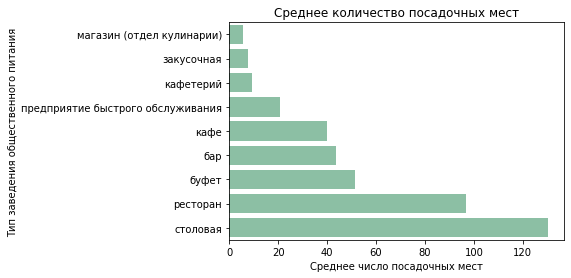

In [16]:
rest_mean = rest.groupby('object_type').agg({'number':'mean'}).sort_values(by='number').reset_index()
sns.barplot(data=rest_mean, y='object_type', x='number', orient='h', color='#84C7A4')
plt.xlabel('Среднее число посадочных мест')
plt.ylabel('Тип заведения общественного питания')
plt.title('Среднее количество посадочных мест')


На диаграмме мы видим что самое большое среднее количество посадочных мест у завдений типа "Столовая"

6. Построим график топ-10 улиц по количеству объектов общественного питания и найдем соответствующие районы Москвы. Для этого создадим столбец с наимеванием улицы, и найдем район, воспользовавшись данными в интернете.

In [17]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

rest['street'] = rest['address'].str.extract(str_pat)
rest.head()

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


In [18]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15284 non-null  int64 
 1   object_name  15284 non-null  object
 2   chain        15284 non-null  object
 3   object_type  15284 non-null  object
 4   address      15284 non-null  object
 5   number       15284 non-null  int64 
 6   street       14831 non-null  object
dtypes: int64(2), object(5)
memory usage: 955.2+ KB


Наименование улицы заполнилось не во всех строках датасета, т.к. некоторые адреса не содержат улицу.

In [20]:
url = 'https://drive.google.com/file/d/1H451WN4By_yMUV1Yzv-d0hC6_8NsRmZY/view?usp=drivesdk'
path = 'https://drive.google.com/uc?exort=download&id='+url.split('/')[-2]
district = pd.read_csv(path).rename(columns={'район':'district',
                                            'улица':'street'}).drop_duplicates()

In [21]:
rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15284 non-null  int64 
 1   object_name  15284 non-null  object
 2   chain        15284 non-null  object
 3   object_type  15284 non-null  object
 4   address      15284 non-null  object
 5   number       15284 non-null  int64 
 6   street       14831 non-null  object
dtypes: int64(2), object(5)
memory usage: 955.2+ KB


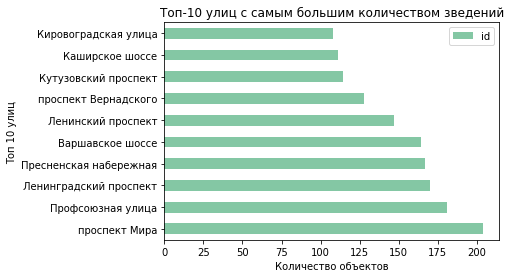

In [22]:
top10 = rest.pivot_table(index=['street'],
                 values='id',
                 aggfunc='count').reset_index().sort_values(by='id', 
                                                            ascending=False).head(10)
top10.plot(kind='barh', x='street', color='#84C7A4')
                                                                                          
plt.xlabel('Количeство объектов')
plt.ylabel('Топ 10 улиц')
plt.title('Топ-10 улиц с самым большим количеством зведений')
plt.show()

На диаграмме показаны 10 улиц с самым большим количеством заведений. На первом месте проспект Мира.

In [23]:
district_street = top10.merge(district,
                             on='street', how='left')


In [24]:
district_street[['street', 'district']].drop_duplicates()

,street,district
0,проспект Мира,NaN
1,Профсоюзная улица,Академический
2,Профсоюзная улица,Коньково
3,Профсоюзная улица,Обручевский
4,Профсоюзная улица,Теплый Стан
5,Профсоюзная улица,Черемушки
6,Профсоюзная улица,Ясенево
7,Ленинградский проспект,Аэропорт
8,Ленинградский проспект,Беговой
9,Ленинградский проспект,Сокол


7. Найдем число улиц с одним объектом общественного питания и определим в каких районах Москвы находятся эти улицы.

In [25]:
rest.groupby('street').agg({'id':'count'}).reset_index().query('id == 1')['street'].count()

551

In [34]:
low_quantity = rest.pivot_table(index='street',
                 values='id',
                 aggfunc='count').reset_index().query('id == 1').drop_duplicates()
low_quantity.merge(district, on='street', how='left').groupby('district').agg({'street':'count'}).sort_values(by='street',
                                                                     ascending=False).head(20)
                                                                                          

,street
district,
Троицкий,50
Новомосковский,48
Хамовники,24
Таганский,24
Басманный,23
Арбат,17
Пресненский,14
Мещанский,14
Замоскворечье,12


## Выводы


Проведен анализ рынка заведеий общественного питания в г. Москва. Анализ проводился на основании данных из открытых источников в сети интернет.
Анализ показал что самое большое количество заведений относится к категории "Кафе" - около 6 тыс. Далее по количеству заведений можно выделить предприятия быстррого обслуживания, рестораны и столовые. У них доли примерно одинаковые 2-2,5 тыс.Сетевые заведения составляют примерно 1/5 от всех заведений. 4/5 части - это несетевые заведения. Сетвые заведения представлены не более 20 шт с 0-150 посадочных мест. Можно сказать что преобладают заведения с большим количеством посадочных мест и небольшим количеством заведений в сети. Самое большое среднее количество посадочных мест у завдений типа "Столовая" - около 120.

Исходя из полученных данных, можно сделать вывод что для открытия кафе с роботами лучше всего выбрать типа "Кафе". При выборе места избегать улицы, входящие в 1 десятку улиц по количеству заведений общественного питания. Районы стоит рассматривать из списка районов с наименьшим количеством кафе, но для выбора приоритетного района данных недостаточно. Необходимо оценить проходимость в этих районах.

Вцелом, для оценки окупаемости инвестиций стоит дополнительно проанализировать проходимость улиц и районов, а также сравнить финансовые результаты заведений.






Презентация: <https://drive.google.com/file/d/1p_4uiwrZh39xMQn_BIbXchL8Tov9Vith/view?usp=drivesdk>